In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from  sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("../data/housing.csv")
data.head(5)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [39]:
# Dữ liệu không có head nên phải thêm header
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("../data/housing.csv", delimiter=r"\s+", names = column_names)
data.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [41]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


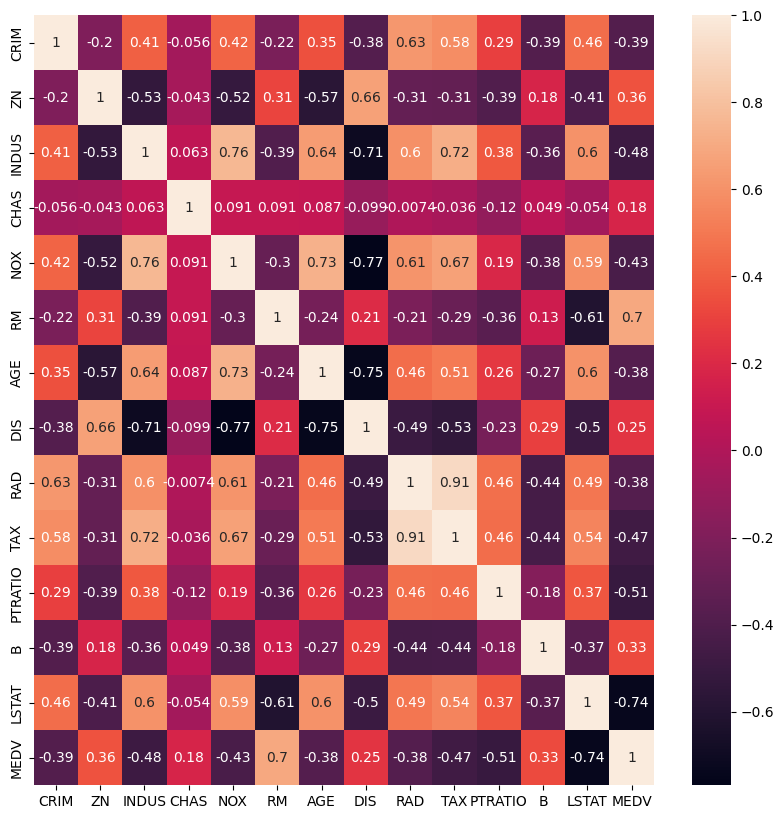

In [42]:
plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [43]:
target = data.drop(["MEDV"], axis = 1)

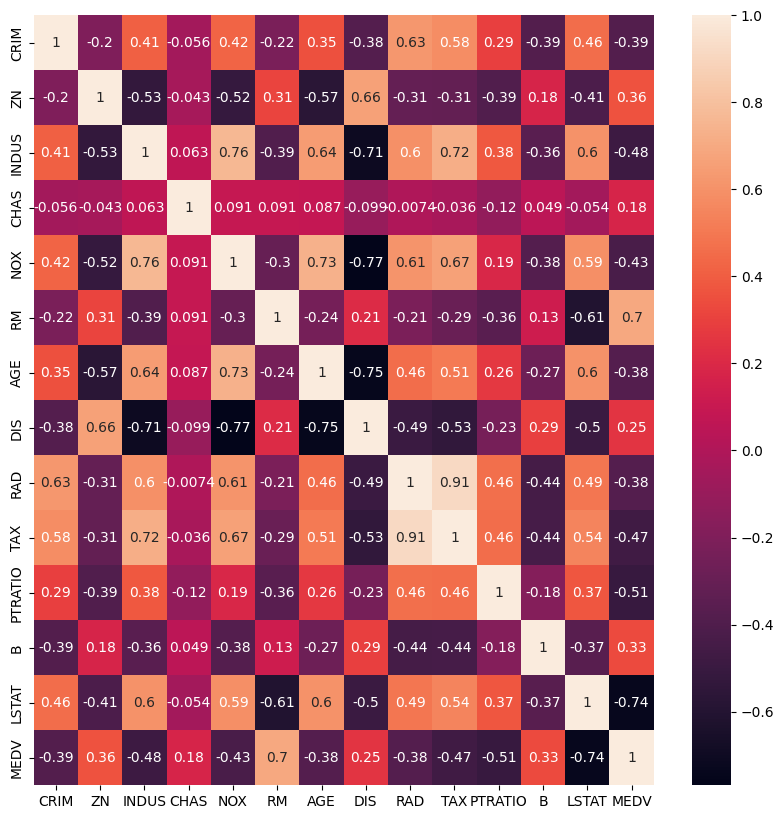

In [44]:
plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [45]:
thresold = 0.9
table = data.copy()
table.describe

corr_matrix = table.drop(['MEDV'], axis = 1).corr().abs() ## lấy corr matrix
corr_medv = table.corr()[['MEDV']].abs() #[[]]dataframe [] series
up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# where: thay vào các phần tử 1
# triu: trimatrix
# ones: fill with one
# astype: True False
drop = list()

for row in range(len(up) -1):
    for col in range(row+1, len(up)):
        if corr_matrix.iloc[row, col] > thresold:
            if corr_medv.iloc[row,0] < corr_medv.iloc[col,0]:
                drop.append(column_names[row])
            else:
                drop.append(column_names[col])

drop            
#print(corr_matrix)

['RAD']

In [46]:
data.insert(0, "bias", 1)
#data = data.drop(['RAD'], axis = 1)
data

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,1,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,1,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,1,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [47]:
type(data)

pandas.core.frame.DataFrame

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(["MEDV"], axis = 1), data["MEDV"], test_size = 0.2, random_state = 2)


In [49]:
# tiền xử lí để dữ liệu đồng đều hơn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transform = scaler.fit(X_train)
X_train = transform.transform(X_train)
X_test = transform.transform(X_test)

In [50]:
### Using library
linear = LinearRegression()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)

 
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(Y_test, Y_pred))

18.495420122448373


In [51]:
class ManualLinearRegression():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def mse(self, X, Y, W):
        pred = X.T.dot(W)
        pred = (pred-Y)**2
        return (1/len(Y))*(sum(pred))
    
    def fit(self):
        return np.dot(np.linalg.pinv(self.X.dot(self.X.T)),self.X.dot(self.Y))

    

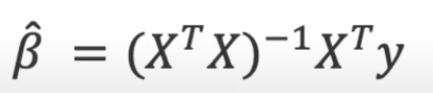


In [52]:
linear = ManualLinearRegression(np.array(X_train).T, np.array(Y_train).reshape(-1, 1))
w = linear.fit()

print(linear.mse(np.array(X_test).T, np.array(Y_test).reshape(-1, 1), w))
w.shape

[504.90981669]


(14, 1)